# LOGISTIC REGRESSION
By:
Aman Rohada | Kunal Dey | Analytics in Banking & Services

In [5]:
#Importing libraries
import numpy as np 
import pandas as pd 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

# Step 1. Data Importing

In [6]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [7]:
data_set = pd.read_csv (r"C:\Users\amanr\Downloads\suv_data.csv")

In [8]:
data_set.head (10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


# Step 2.Data Pre-Processing

In [9]:
data_set.shape

(400, 5)

In [10]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
data_set.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [12]:
data_set.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


* 0-Not Purchased  SUV
* 1-Purchased SUV

In [13]:
new_data_set = data_set.drop (columns = ['User ID'], axis = '1')
new_data_set.head ()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [14]:
new_data_set.describe ()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Step 3.Visualizing Data

<AxesSubplot:xlabel='Purchased', ylabel='count'>

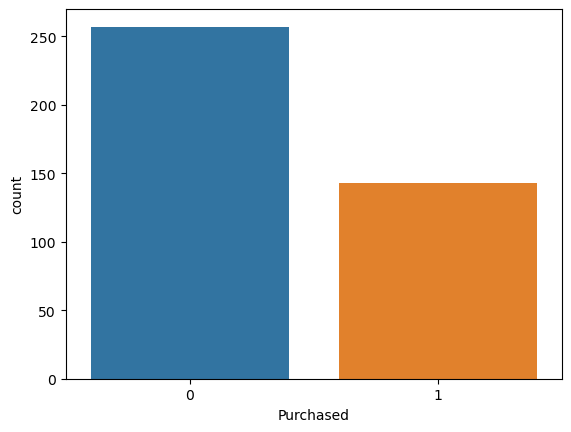

In [15]:
sns.countplot (x = 'Purchased', data = new_data_set)

<AxesSubplot:>

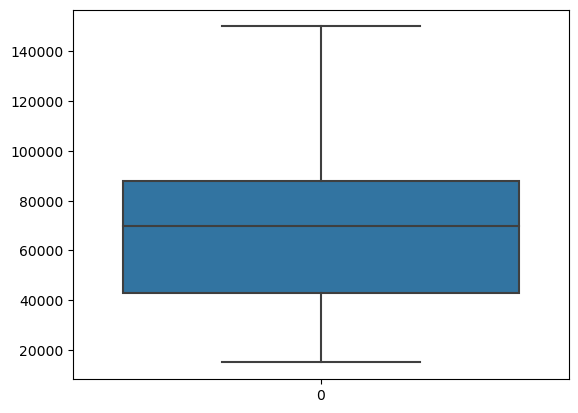

In [16]:
sns.boxplot(data=new_data_set.EstimatedSalary)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

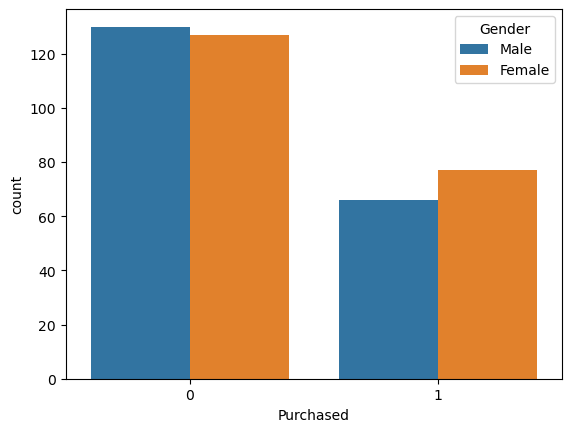

In [77]:
sns.countplot ( x = 'Purchased', hue = 'Gender',data = new_data_set)

<AxesSubplot:>

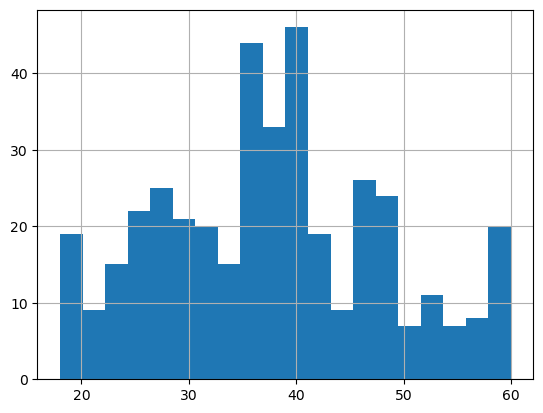

In [18]:
new_data_set ['Age'].hist(bins = 20)

In [19]:
def age_group (new_data_set):
    if new_data_set ['Age']<= 20:
        return 'A'
    elif 20 < new_data_set ['Age'] <= 26:
        return 'B'
    elif 26 < new_data_set ['Age']<= 30:
         return 'C'
    elif 30 <new_data_set ['Age'] <= 40:
         return 'D'
    elif 40 < new_data_set ['Age']<= 50:
         return 'E'
    else:
         return 'F'
new_data_set['age_group']=new_data_set.apply(lambda x :age_group(x),axis=1)

In [20]:
new_data_set.head()

,Gender,Age,EstimatedSalary,Purchased,age_group
0,Male,19,19000,0,A
1,Male,35,20000,0,D
2,Female,26,43000,0,B
3,Female,27,57000,0,C
4,Male,19,76000,0,A


In [21]:
new_data_set.age_group.value_counts(dropna=False)

D    142
E     98
F     49
B     46
C     46
A     19
Name: age_group, dtype: int64

In [22]:
((142+98+49)/400)*100

72.25

72.25 % of customers lies between age_group 30 to 60 yrs

<AxesSubplot:xlabel='Purchased', ylabel='count'>

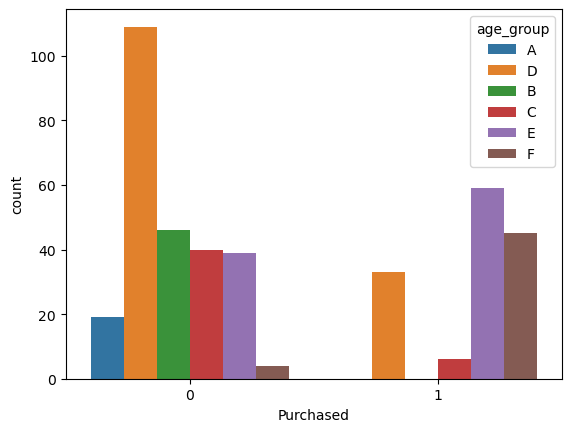

In [23]:
sns.countplot ( x = 'Purchased', hue = 'age_group', data = new_data_set)

* People yonger than 20 years old don't buy a SUV.
* People between 20 and 26 years old don't buy SUV.
* People younger than 26 don't buy SUVs.
* Most of the people buying SUV are between 40 to 60 years old.

<AxesSubplot:>

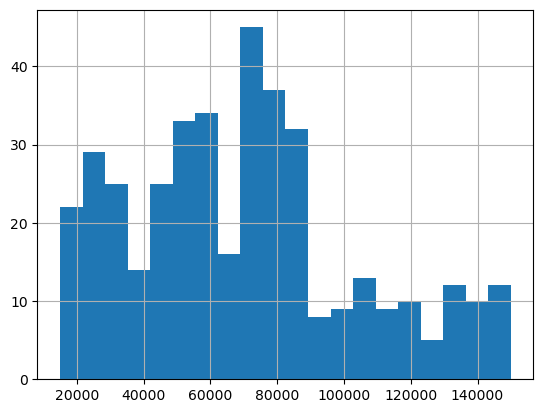

In [24]:
new_data_set ['EstimatedSalary'].hist(bins = 20)

In [25]:
def income_category(new_data_set): 

    if new_data_set ['EstimatedSalary']<= 19500:
        return ('Very Low')
    elif 19500 < new_data_set ['EstimatedSalary'] <= 40000:
        return ('Low')
    elif 40000 < new_data_set ['EstimatedSalary']<= 60000:
        return ('Moderately Low')
    elif 60000 < new_data_set ['EstimatedSalary']<= 80000:
        return ('Medium');
    elif 80000 < new_data_set ['EstimatedSalary']<= 100000:
        return ('Moderately high')
    elif 100000 < new_data_set ['EstimatedSalary']<= 130000:
        return ('Very High')
    elif 130000 < new_data_set ['EstimatedSalary']<= 145000:
        return ('Very High')
    else:
        return ('Extremely High')

new_data_set['income_category']=new_data_set.apply(lambda x :income_category(x),axis=1)

In [26]:
new_data_set.head()

,Gender,Age,EstimatedSalary,Purchased,age_group,income_category
0,Male,19,19000,0,A,Very Low
1,Male,35,20000,0,D,Low
2,Female,26,43000,0,B,Moderately Low
3,Female,27,57000,0,C,Moderately Low
4,Male,19,76000,0,A,Medium


## Purchase SUV Analysis

<AxesSubplot:xlabel='Purchased', ylabel='count'>

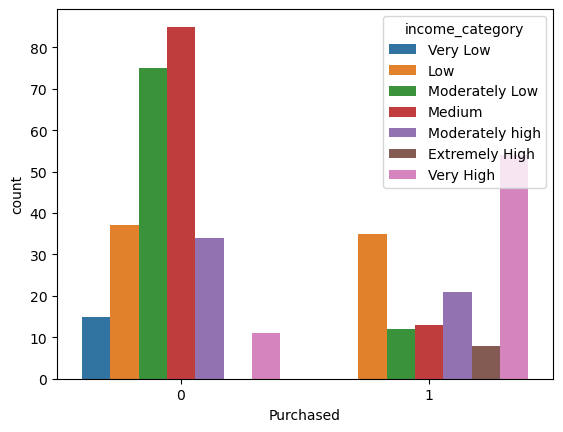

In [27]:
sns.countplot ( x = 'Purchased', hue = 'income_category', data = new_data_set)

* People with salaries higher that 145000 will buy SUVs.
* People with salaries lower than 19500 won't buy SUVs.
* Majority of people buying SUVs have slaries between 100000 to 130000.

In [79]:
new_data_set.groupby ('Gender').size()

Gender
Female    204
Male      196
dtype: int64

In [28]:
new_data_set.groupby ('Purchased').size()

Purchased
0    257
1    143
dtype: int64

In [29]:
(257/400)*100

64.25

64.25% of people did not purchased SUV

In [30]:
import plotly.express as px

fig = px.pie(new_data_set,names='Purchased',color='Purchased',
             color_discrete_map={0:'red',
                                 1:'green'})
fig.show()

* 0-Not Purchased SUV
* 1-Purchased SUV

In [31]:
NotPurchased= new_data_set[new_data_set["Purchased"] == 0]  #257

NotPurchased

,Gender,Age,EstimatedSalary,Purchased,age_group,income_category
0,Male,19,19000,0,A,Very Low
1,Male,35,20000,0,D,Low
2,Female,26,43000,0,B,Moderately Low
3,Female,27,57000,0,C,Moderately Low
4,Male,19,76000,0,A,Medium
...,...,...,...,...,...,...
377,Female,42,53000,0,E,Moderately Low
380,Male,42,64000,0,E,Medium
387,Male,39,71000,0,D,Medium
394,Female,39,59000,0,D,Moderately Low


In [32]:
fig = px.sunburst(NotPurchased, path=["Gender","Age","EstimatedSalary","Purchased","age_group","income_category"])
fig.show()

# Step4.Breaking Data Into Two Parts

In [33]:
new_data_set.select_dtypes(include=[np.number]).columns.tolist()

['Age', 'EstimatedSalary', 'Purchased']

In [34]:
# Qualitative Variable
Quantitative_Variable = new_data_set[new_data_set.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


In [35]:
binary_gender = pd.get_dummies (new_data_set ['Gender'],drop_first = True)
binary_gender.head ()

,Male
0,1
1,1
2,0
3,0
4,1


In [36]:
binary_age = pd.get_dummies (new_data_set ['age_group'])
binary_age.head ()

,A,B,C,D,E,F
0,1,0,0,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,1,0,0,0,0,0


In [37]:
binary_income = pd.get_dummies (new_data_set ['income_category'])
binary_income.head ()


,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0


In [38]:
final_data_set  = pd.concat ([new_data_set, binary_age, binary_gender, binary_income], axis = 1)
final_data_set_1 = final_data_set.drop (columns = ['Age', 'Gender','EstimatedSalary','income_category', 'age_group'], axis = 1)
final_data_set_1.head ()

,Purchased,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


# Step 5. Modelling Data


Modeling the data considering all the features available in the dataset

# Hypothesis

* H0 :- There is no log linear relationship between Loan_Status and all independent Variable 

* H1 :- There is log linear relationship between Loan_Status and all independent Variable

Alpha = 0.05 (5%)

In [39]:
Y = final_data_set_1 ['Purchased']
X = final_data_set_1.drop (columns = ['Purchased'], axis = 1)

In [40]:
X.head()

,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,1,0,0,1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,1,0,0,0,0


In [41]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [42]:
Y.tail()

395    1
396    1
397    1
398    0
399    1
Name: Purchased, dtype: int64

# Step 6.Data Partition

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = 0.2, random_state = 10)


In [44]:
X_train

,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low
303,0,0,0,1,0,0,1,0,0,1,0,0,0,0
349,0,0,0,1,0,0,1,0,0,1,0,0,0,0
149,1,0,0,0,0,0,1,0,0,1,0,0,0,0
100,0,0,1,0,0,0,1,0,0,0,0,1,0,0
175,0,1,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,0,0,0,0,0,1,0,0,1,0,0,0,0,0
320,0,0,0,0,0,1,0,0,0,0,0,0,1,0
15,0,0,1,0,0,0,1,0,0,1,0,0,0,0
125,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [45]:
Y_train

303    1
349    0
149    0
100    0
175    0
      ..
369    1
320    1
15     0
125    0
265    1
Name: Purchased, Length: 320, dtype: int64

# Step 7. Logistics Regression

In [48]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
output=logreg.fit(X_train, Y_train) # model = output

In [49]:
output.intercept_  

array([-1.0883565])

In [50]:
output.coef_  

array([[-1.34245598, -1.88394956, -0.88242914, -0.08550397,  1.46702909,
         2.7273632 ,  0.48869656,  1.69367275,  0.15967655, -1.27306366,
        -1.43084173,  0.29132316,  1.49998153, -0.94069497]])

In [51]:
output.feature_names_in_

array(['A', 'B', 'C', 'D', 'E', 'F', 'Male', 'Extremely High', 'Low',
       'Medium', 'Moderately Low', 'Moderately high', 'Very High',
       'Very Low'], dtype=object)

# Step 8. Prediction on trained dataset

In [52]:
train=pd.concat([X_train,Y_train],axis=1)
train.head()

,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low,Purchased
303,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1
349,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
149,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
100,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0
175,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [53]:
train['Predicted']=output.predict(X_train)
train.head()

,A,B,C,D,E,F,Male,Extremely High,Low,Medium,Moderately Low,Moderately high,Very High,Very Low,Purchased,Predicted
303,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
349,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
149,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
100,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
175,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [54]:
output.predict_proba(X_train)

array([[0.87634101, 0.12365899],
       [0.87634101, 0.12365899],
       [0.96140153, 0.03859847],
       [0.76687802, 0.23312198],
       [0.9433545 , 0.0566455 ],
       [0.70734774, 0.29265226],
       [0.89955468, 0.10044532],
       [0.76687802, 0.23312198],
       [0.90645815, 0.09354185],
       [0.87634101, 0.12365899],
       [0.33250844, 0.66749156],
       [0.92033623, 0.07966377],
       [0.62843   , 0.37157   ],
       [0.44814587, 0.55185413],
       [0.98587203, 0.01412797],
       [0.96684862, 0.03315138],
       [0.04152737, 0.95847263],
       [0.76687802, 0.23312198],
       [0.92033623, 0.07966377],
       [0.9402037 , 0.0597963 ],
       [0.9402037 , 0.0597963 ],
       [0.84283334, 0.15716666],
       [0.7097955 , 0.2902045 ],
       [0.09217357, 0.90782643],
       [0.33849779, 0.66150221],
       [0.26365726, 0.73634274],
       [0.92033623, 0.07966377],
       [0.96845554, 0.03154446],
       [0.30686484, 0.69313516],
       [0.62843   , 0.37157   ],
       [0.

# Step 9. Model Performance Metrice

In [55]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'], train['Purchased'])
matrix

array([[190,  20],
       [ 15,  95]], dtype=int64)

In [56]:
Accuracy_Train=((190+95)/(320)*100)
print(Accuracy_Train)

89.0625


### Accuracy of the model is 89.0625 %


In [57]:
from sklearn.metrics import classification_report
print(classification_report(train['Purchased'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.90      0.93      0.92       205
           1       0.86      0.83      0.84       115

    accuracy                           0.89       320
   macro avg       0.88      0.88      0.88       320
weighted avg       0.89      0.89      0.89       320



#### Accuracy of  Model is 90%,Hence Model is good Fit 
#### Accuracy of SUV Not Purchased  by Model is 93% ( Sensitivity )
#### Accuracy of SUV Purchased by Model is 83 % (Specificity)

# Step 10. Prediction on Test Datasets

In [58]:
Y = data_set.iloc [:, 4]
X = data_set.iloc [:, 2:4]

In [59]:
print (X.head())

   Age  EstimatedSalary
0   19            19000
1   35            20000
2   26            43000
3   27            57000
4   19            76000


In [60]:
print (Y.head())

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64


In [61]:
test_set_size = 0.2
seed = 10
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X,Y, test_size = test_set_size, random_state = seed)

##### Since the values of the estimated salary feature are in a wide range we need to scale the values.

In [62]:
scaler = StandardScaler ()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [63]:
classifier = LogisticRegression (random_state = 10, solver = 'liblinear')
classifier.fit (X_train, Y_train)

LogisticRegression(random_state=10, solver='liblinear')

In [65]:
predictions = classifier.predict (X_test)

In [66]:
report = classification_report (Y_test, predictions)
print (report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80



#### Accuracy of  Model is 88%,Hence Model is good Fit 
#### Accuracy of SUV Not Purchased  by Model is 936 ( Sensitivity )
#### Accuracy of SUV Purchased by Model is 75 % (Specificity)

In [68]:
accuracy_score (Y_test, predictions)*100


88.75

In [69]:
Model_Values=pd.DataFrame(output.intercept_,index=['Intercept'],columns=['Coefficient'])
Model_Values

,Coefficient
Intercept,-1.088357


In [75]:
logreg = LogisticRegression()
logreg.fit(X, Y)
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds, 
             X.columns, 
             columns=['Coefficient'])\
            .sort_values(by='Coefficient', ascending=False)

,Coefficient
Age,-2.104152e-09
EstimatedSalary,-2.693014e-06


# FINISH